# Import Dependencies

In [1]:
import pandas as pd
import os
import sys
import urllib.request
import glob
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

# Grabbing data

Grabbing NYISO data from 2023.The data is a five minute interval dataset with day ahead zone lbmp, real time zone price, and real time fuel mix.

In [ ]:
http://mis.nyiso.com/public/csv/isolf/20240402isolf.csv

In [2]:
print(dir(os))

['DirEntry', 'EX_OK', 'F_OK', 'GenericAlias', 'Mapping', 'MutableMapping', 'O_APPEND', 'O_BINARY', 'O_CREAT', 'O_EXCL', 'O_NOINHERIT', 'O_RANDOM', 'O_RDONLY', 'O_RDWR', 'O_SEQUENTIAL', 'O_SHORT_LIVED', 'O_TEMPORARY', 'O_TEXT', 'O_TRUNC', 'O_WRONLY', 'P_DETACH', 'P_NOWAIT', 'P_NOWAITO', 'P_OVERLAY', 'P_WAIT', 'PathLike', 'R_OK', 'SEEK_CUR', 'SEEK_END', 'SEEK_SET', 'TMP_MAX', 'W_OK', 'X_OK', '_AddedDllDirectory', '_Environ', '__all__', '__builtins__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_check_methods', '_execvpe', '_exists', '_exit', '_fspath', '_get_exports_list', '_walk', '_wrap_close', 'abc', 'abort', 'access', 'add_dll_directory', 'altsep', 'chdir', 'chmod', 'close', 'closerange', 'cpu_count', 'curdir', 'defpath', 'device_encoding', 'devnull', 'dup', 'dup2', 'environ', 'error', 'execl', 'execle', 'execlp', 'execlpe', 'execv', 'execve', 'execvp', 'execvpe', 'extsep', 'fdopen', 'fsdecode', 'fsencode', 'fspath', 'fstat', 'fsync', 'ftruncate', 'g

In [47]:
# os.makedirs("./zone_damlbmp")
# os.makedirs("./rtfuel_mix")
os.makedirs("./realtime_load")


In [48]:
month_lst = ['01','02','03','04','05','06','07','08','09','10','11','12']
http://mis.nyiso.com/public/csv/pal/20240401pal_csv.zip

In [64]:
month_lst = ['01','02','03','04','05','06','07','08','09','10','11','12']
year_month = "202404"
for month in month_lst:
    time = '2023'+ month
    # urllib.request.urlretrieve("http://mis.nyiso.com/public/csv/damlbmp/" + time + "01damlbmp_zone_csv.zip",  "./zone_damlbmp/"+ time + "data.zip")
    urllib.request.urlretrieve("http://mis.nyiso.com/public/csv/pal/" + time + "01pal_csv.zip",  "./realtime_load/"+ time + "data.zip")
    # urllib.request.urlretrieve("http://mis.nyiso.com/public/csv/rtfuelmix/" + time + "01rtfuelmix_csv.zip",  "./rtfuel_mix/"+ time + "data.zip")

In [65]:
for month in month_lst:
    time = '2023'+ month
    with zipfile.ZipFile("./realtime_load/" + time + "data.zip","r") as zip_ref:
        zip_ref.extractall("./realtime_load")

From the simple plot, we can see obvious spikes of day ahead spikes of LBMP during February, August, and October. We will be looking into these animolies and see if there are anything intersting happening with the RT and fuel mix. From the graph, we cantell that some zones have a higher magnitude whenit comes to congestion and loss cost. Therefore, some transmission upgrade maybe prorotized in these zones.

In [3]:
ff = os.listdir("./rtfuel_mix/")

fuel_list = []

for i in ff:
    temp = pd.read_csv("./rtfuel_mix/" + i)
    fuel_list.append(temp)

fuel = pd.concat(fuel_list)



In [9]:
dayahead = os.listdir("./zone_damlbmp/")

dayahead_lst = []

for i in dayahead:
    temp = pd.read_csv("./zone_damlbmp/" + i)
    dayahead_lst.append(temp)

dayahead_price = pd.concat(dayahead_lst)

In [66]:
RT = os.listdir("./realtime_load/")

RT_lst = []

for i in RT:
    temp = pd.read_csv("./realtime_load/" + i)
    RT_lst.append(temp)

RT_load = pd.concat(RT_lst)

In [167]:
display(fuel)
display(dayahead_price)
display(RT_price)

,Time Stamp,Time Zone,Fuel Category,Gen MW,Year,Month,Day,Hour,Minute
0,2023-01-01 00:05:00,EST,Dual Fuel,2423.0,2023,1,1,0,5
1,2023-01-01 00:05:00,EST,Natural Gas,2742.0,2023,1,1,0,5
2,2023-01-01 00:05:00,EST,Nuclear,3344.0,2023,1,1,0,5
3,2023-01-01 00:05:00,EST,Other Fossil Fuels,5.0,2023,1,1,0,5
4,2023-01-01 00:05:00,EST,Other Renewables,237.0,2023,1,1,0,5
...,...,...,...,...,...,...,...,...,...
2011,2024-01-01 00:00:00,EST,Nuclear,3309.0,2024,1,1,0,0
2012,2024-01-01 00:00:00,EST,Other Fossil Fuels,7.0,2024,1,1,0,0
2013,2024-01-01 00:00:00,EST,Other Renewables,229.0,2024,1,1,0,0
2014,2024-01-01 00:00:00,EST,Wind,31.0,2024,1,1,0,0


,Time Stamp,Name,PTID,DA_LBMP ($/MWHr),DA_Marginal Cost Losses ($/MWHr),DA_Marginal Cost Congestion ($/MWHr),Year,Month,Day,Hour,Minute,date_dist
0,2023-01-01 00:00:00,CAPITL,61757,37.70,0.98,-16.80,2023,1,1,0,0,NaT
1,2023-01-01 00:00:00,CENTRL,61754,21.88,-0.04,-2.00,2023,1,1,0,0,0 days
2,2023-01-01 00:00:00,DUNWOD,61760,33.22,1.47,-11.82,2023,1,1,0,0,0 days
3,2023-01-01 00:00:00,GENESE,61753,21.14,-0.42,-1.63,2023,1,1,0,0,0 days
4,2023-01-01 00:00:00,H Q,61844,19.63,-0.30,0.00,2023,1,1,0,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2023-12-31 23:00:00,NORTH,61755,25.22,0.22,0.00,2023,12,31,23,0,0 days
131396,2023-12-31 23:00:00,NPX,61845,25.64,0.65,0.00,2023,12,31,23,0,0 days
131397,2023-12-31 23:00:00,O H,61846,24.05,-0.95,0.00,2023,12,31,23,0,0 days
131398,2023-12-31 23:00:00,PJM,61847,24.09,-0.05,0.86,2023,12,31,23,0,0 days


,Time Stamp,Name,PTID,RT_LBMP ($/MWHr),RT_Marginal Cost Losses ($/MWHr),RT_Marginal Cost Congestion ($/MWHr)
0,2023-01-01 00:05:00,CAPITL,61757,29.57,1.31,-3.98
1,2023-01-01 00:05:00,CENTRL,61754,24.53,-0.22,-0.47
2,2023-01-01 00:05:00,DUNWOD,61760,28.82,1.75,-2.80
3,2023-01-01 00:05:00,GENESE,61753,23.86,-0.80,-0.38
4,2023-01-01 00:05:00,H Q,61844,24.06,-0.22,0.00
...,...,...,...,...,...,...
4315,2024-01-01 00:00:00,NORTH,61755,31.91,1.02,0.00
4316,2024-01-01 00:00:00,NPX,61845,31.48,0.59,0.00
4317,2024-01-01 00:00:00,O H,61846,28.73,-2.16,0.00
4318,2024-01-01 00:00:00,PJM,61847,30.44,-0.37,0.08


# Data cleaning
### Fuel mix

In [3]:
print(fuel.isna().sum())
fuel["Time Stamp"] = pd.to_datetime(fuel["Time Stamp"])

Time Stamp       0
Time Zone        0
Fuel Category    0
Gen MW           0
dtype: int64


In [4]:
fuel['Year'] = pd.DatetimeIndex(fuel['Time Stamp']).year
fuel['Month'] = pd.DatetimeIndex(fuel['Time Stamp']).month
fuel['Day'] = pd.DatetimeIndex(fuel['Time Stamp']).day
fuel['Hour'] = pd.DatetimeIndex(fuel['Time Stamp']).hour
fuel['Minute'] = pd.DatetimeIndex(fuel['Time Stamp']).minute

In [7]:
num_cat = fuel['Fuel Category'].nunique()
print(f'There are {num_cat} fuel categories')

There are 7 fuel categories


In [8]:
fuel.set_index(fuel["Time Stamp"], inplace=True)

In [9]:
off_peak = fuel.between_time('23:00:00', '06:59:59')
on_peak = fuel.between_time('07:00:00', '22:59:59')

In [16]:
off_peak_avg = off_peak.groupby(['Fuel Category']).mean(numeric_only=True)
off_peak_avg['percent'] = off_peak_avg['Gen MW'] / off_peak_avg['Gen MW'].sum()
# display(off_peak_avg.groupby(['Fuel Category']).mean(numeric_only=True))
on_peak_avg = on_peak.groupby(['Fuel Category']).mean(numeric_only=True)
on_peak_avg['percent'] = on_peak_avg['Gen MW'] / on_peak_avg['Gen MW'].sum()
# display(on_peak_avg.groupby(['Fuel Category']).mean())

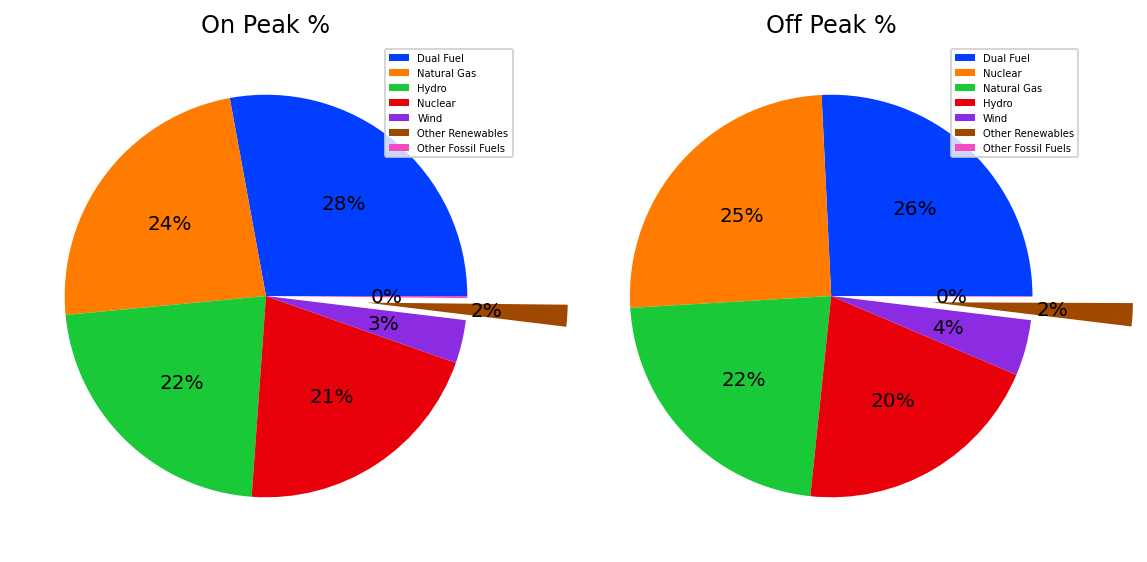

In [106]:
# The on peak and Off peak fuel mix percenateg are pretty even.
fig = plt.figure(figsize=(8,6),dpi=144)
ax1 = fig.add_subplot(121)
keys = off_peak['Fuel Category'].unique().tolist()
explode = (0, 0, 0, 0, 0, 0.5, 0)
palette_color = sns.color_palette('bright') 
ax1.pie(on_peak_avg['percent'].sort_values(ascending=False), colors=palette_color, autopct='%.0f%%',explode = explode)
keys = on_peak_avg['percent'].sort_values(ascending=False).keys()
ax1.legend(labels=keys, fontsize="5")
ax1.set_title('On Peak %')
ax2 = fig.add_subplot(122)
ax2.pie(off_peak_avg['percent'].sort_values(ascending=False), colors=palette_color, autopct='%.0f%%',explode = explode)
keys = off_peak_avg['percent'].sort_values(ascending=False).keys()
ax2.legend(labels=keys, fontsize="5")
ax2.set_title('Off Peak %')
plt.tight_layout()

In [30]:
winter = fuel[(fuel['Month'] == 12) | (fuel['Month'] == 1) | (fuel['Month'] == 2)]
spring = fuel[(fuel['Month'] == 3) | (fuel['Month'] == 4) | (fuel['Month'] == 5)]
summer = fuel[(fuel['Month'] == 6) | (fuel['Month'] == 7) | (fuel['Month'] == 8)]
fall = fuel[(fuel['Month'] == 9) | (fuel['Month'] == 10) | (fuel['Month'] == 11)]

In [31]:
winter_avg = winter.groupby(['Fuel Category']).mean(numeric_only=True)
winter_avg['percent'] = winter_avg['Gen MW'] / winter_avg['Gen MW'].sum()
spring_avg = spring.groupby(['Fuel Category']).mean(numeric_only=True)
spring_avg['percent'] = spring_avg['Gen MW'] / spring_avg['Gen MW'].sum()
summer_avg = summer.groupby(['Fuel Category']).mean(numeric_only=True)
summer_avg['percent'] = summer_avg['Gen MW'] / summer_avg['Gen MW'].sum()
fall_avg = fall.groupby(['Fuel Category']).mean(numeric_only=True)
fall_avg['percent'] = fall_avg['Gen MW'] / fall_avg['Gen MW'].sum()

In [102]:
winter_avg['percent'].sort_values(ascending=False).keys()

Index(['Dual Fuel', 'Natural Gas', 'Hydro', 'Nuclear', 'Wind',
       'Other Renewables', 'Other Fossil Fuels'],
      dtype='object', name='Fuel Category')

Text(0.5, 1.0, 'Spring %')

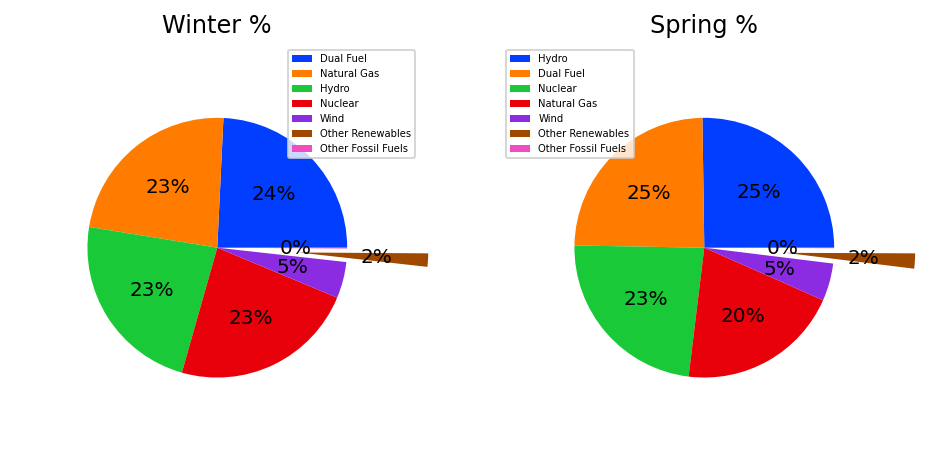

In [107]:
fig = plt.figure(figsize=(8,6),dpi=144)
ax1 = fig.add_subplot(121)
keys = winter_avg['percent'].sort_values(ascending=False).keys()
palette_color = sns.color_palette('bright') 

ax1.pie(winter_avg['percent'].sort_values(ascending=False), colors=palette_color, autopct='%.0f%%',radius=.8,explode = explode)
ax1.legend(labels=keys, fontsize="5")
ax1.set_title('Winter %')
ax2 = fig.add_subplot(122)
ax2.pie(spring_avg['percent'].sort_values(ascending=False), colors=palette_color, autopct='%.0f%%',radius=.8,explode = explode)
keys = spring_avg['percent'].sort_values(ascending=False).keys()
ax2.legend(labels=keys, fontsize="5")
ax2.set_title('Spring %')

Text(0.5, 1.0, 'Fall %')

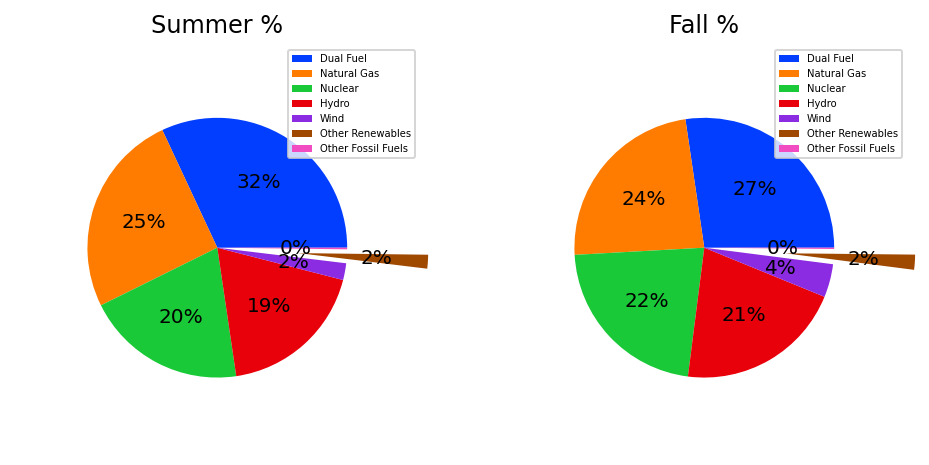

In [108]:
fig = plt.figure(figsize=(8,6),dpi=144)
ax1 = fig.add_subplot(121)
keys = off_peak['Fuel Category'].unique().tolist()
palette_color = sns.color_palette('bright') 
ax1.pie(summer_avg['percent'].sort_values(ascending=False), colors=palette_color, autopct='%.0f%%',radius=.8,explode = explode)
keys = summer_avg['percent'].sort_values(ascending=False).keys()
ax1.legend(labels=keys, fontsize="5")
ax1.set_title('Summer %')
ax2 = fig.add_subplot(122)
ax2.pie(fall_avg['percent'].sort_values(ascending=False), colors=palette_color, autopct='%.0f%%',radius=.8,explode = explode)
keys = fall_avg['percent'].sort_values(ascending=False).keys()
ax2.legend(labels=keys, fontsize="5")
ax2.set_title('Fall %')

Summer uses more Dual Fuel compared to other seasons, and it has the highest precentage through out the year. Wind generates more power in the Winter season. Natural gas remains close to 25% through out the year. During summer, Wind, Hydro, and Nuclear are replaced ny dual fuel.

### dayahead_price
The dayahead price is a hourly dataset containing 15 zones. The conlumns includes

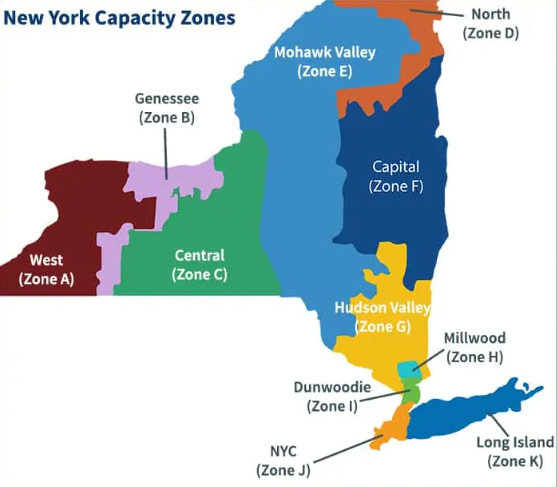
- LBMP ($/MWHr): The cost to provide the next MW of Load at a specific location in the grid is the Marginal Price (LBMP) (LBMP = ENERGY + LOSS - CONGESTION)
- Marginal Cost Losses ($/MWHr): Some amount of generation will be lost along path to load due to
heat dissipation.
- Marginal Cost Congestion ($/MWHr): In some instances, dispatching least costly generation may exceed line limitations. More costly units may subsequently be dispatched to avoid
exceeding those limits.

In [10]:
print(dayahead_price.isna().sum())

Time Stamp                           0
Name                                 0
PTID                                 0
LBMP ($/MWHr)                        0
Marginal Cost Losses ($/MWHr)        0
Marginal Cost Congestion ($/MWHr)    0
dtype: int64


In [11]:
dayahead_price.rename(columns={"LBMP ($/MWHr)": "DA_LBMP ($/MWHr)", "Marginal Cost Losses ($/MWHr)": "DA_Marginal Cost Losses ($/MWHr)","Marginal Cost Congestion ($/MWHr)": "DA_Marginal Cost Congestion ($/MWHr)"},inplace = True)
# RT_price.rename(columns={"LBMP ($/MWHr)": "RT_LBMP ($/MWHr)", "Marginal Cost Losses ($/MWHr)": "RT_Marginal Cost Losses ($/MWHr)","Marginal Cost Congestion ($/MWHr)": "RT_Marginal Cost Congestion ($/MWHr)"},inplace = True)

In [12]:
dayahead_price["Time Stamp"] = pd.to_datetime(dayahead_price["Time Stamp"])

In [13]:
dayahead_price['Year'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).year
dayahead_price['Month'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).month
dayahead_price['Day'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).day
dayahead_price['Hour'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).hour
dayahead_price['Minute'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).minute

In [14]:
dayahead_price.Name.nunique()
print(f'There are {dayahead_price.Name.nunique()} unique zones in the LBMP, each with a different code.')

There are 15 unique zones in the LBMP, each with a different code.


In [15]:
dayahead_price["Time Stamp"] = pd.to_datetime(dayahead_price["Time Stamp"])
dayahead_price.set_index(dayahead_price["Time Stamp"], inplace=True)

In [16]:
dayahead_price['Year'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).year
dayahead_price['Month'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).month
dayahead_price['Day'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).day
dayahead_price['Hour'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).hour
dayahead_price['Minute'] = pd.DatetimeIndex(dayahead_price['Time Stamp']).minute

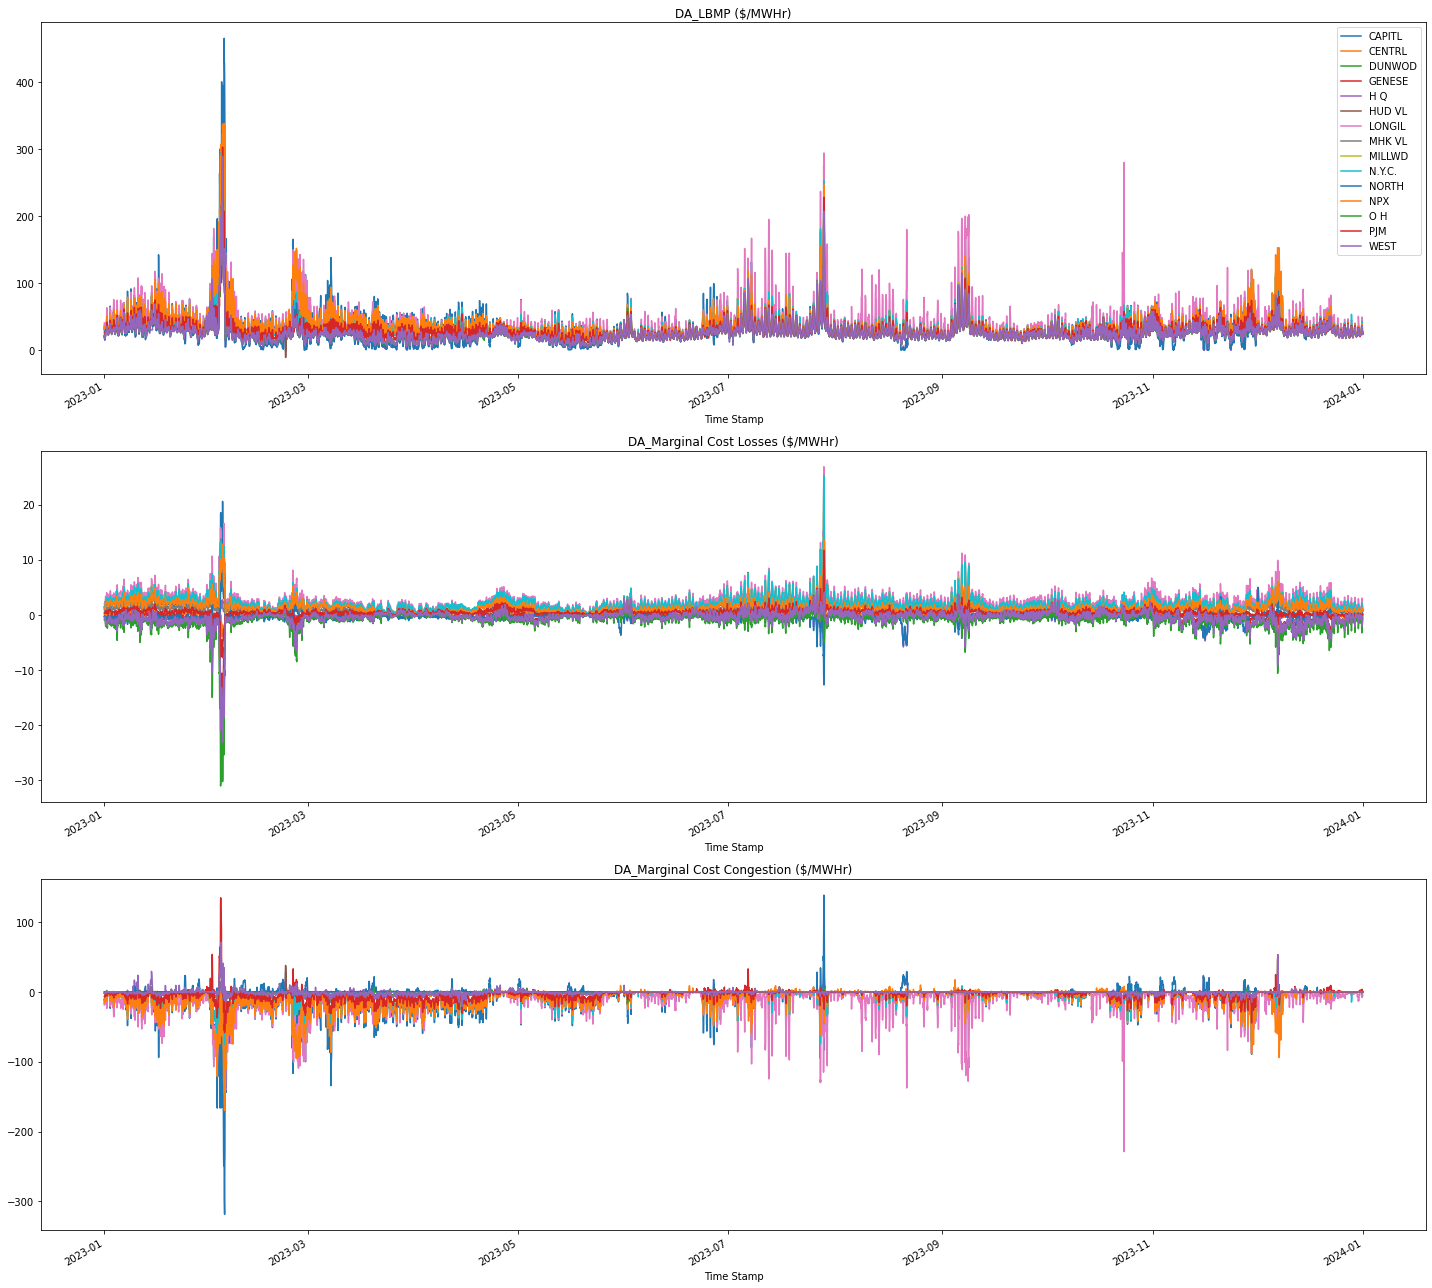

In [17]:
fig,ax = plt.subplots(nrows = 3,ncols = 1, figsize = (20,18))
dayahead_price.groupby(['Name'])['DA_LBMP ($/MWHr)'].plot(legend=True,ax = ax[0])
ax[0].set_title('DA_LBMP ($/MWHr)')
dayahead_price.groupby(['Name'])['DA_Marginal Cost Losses ($/MWHr)'].plot(ax = ax[1])
ax[1].set_title('DA_Marginal Cost Losses ($/MWHr)')
dayahead_price.groupby(['Name'])['DA_Marginal Cost Congestion ($/MWHr)'].plot(ax = ax[2])
ax[2].set_title('DA_Marginal Cost Congestion ($/MWHr)')
plt.tight_layout()

In [45]:
print('Cost losses:')
display(dayahead_price.groupby(['Name'])['DA_Marginal Cost Losses ($/MWHr)'].mean().sort_values(ascending=False))
print('Congestion cost:')
display(dayahead_price.groupby(['Name'])['DA_Marginal Cost Congestion ($/MWHr)'].mean().sort_values(ascending=False))

Cost losses:


Name
LONGIL    2.497550
N.Y.C.    2.004834
DUNWOD    1.917952
MILLWD    1.817752
HUD VL    1.594647
CAPITL    1.349355
NPX       1.305447
MHK VL    0.888535
PJM       0.511348
CENTRL    0.247529
GENESE   -0.196241
NORTH    -0.346769
H Q      -0.398473
WEST     -0.455234
O H      -0.956471
Name: DA_Marginal Cost Losses ($/MWHr), dtype: float64

Congestion cost:


Name
NORTH      0.734527
H Q        0.313469
O H       -0.803935
WEST      -0.851049
GENESE    -0.930458
CENTRL    -1.386002
MHK VL    -1.437307
PJM       -3.374839
HUD VL    -6.392281
DUNWOD    -6.571963
MILLWD    -6.598900
N.Y.C.    -6.658619
NPX       -8.709099
CAPITL    -9.749207
LONGIL   -12.984950
Name: DA_Marginal Cost Congestion ($/MWHr), dtype: float64

From the simple plot, we can see obvious spikes of day ahead spikes of LBMP during February, August, and October. We will be looking into these animolies and see if there are anything intersting happening with the RT and fuel mix. From the graph, we cantell that some zones have a higher magnitude whenit comes to congestion and loss cost. Therefore, some transmission upgrade maybe prorotized in these zones.

### RT
The real time load is a 5 minute dataset containing 11 zones. The conlumns includes


In [82]:
print(RT_load.isna().sum())
#There are 33 missing data points in load
RT_load[RT_load.isna().any(axis=1)]
#The nan value seems to be evenly spread out in all the zone at the same time instance. A simple interpolation would prob be a good method to fill nans
RT_load.interpolate( inplace=True)
print(RT_load.isna().sum())

Time Stamp     0
Time Zone      0
Name           0
PTID           0
Load          33
dtype: int64
Time Stamp    0
Time Zone     0
Name          0
PTID          0
Load          0
dtype: int64


In [ ]:
RT_load.set_index('Time Stamp',inplace=True)

Name
CAPITL    0.075433
CENTRL    0.099883
DUNWOD    0.036811
GENESE    0.062116
HUD VL    0.061294
LONGIL    0.131806
MHK VL    0.047853
MILLWD    0.018268
N.Y.C.    0.328444
NORTH     0.038731
WEST      0.099362
Name: Load, dtype: float64

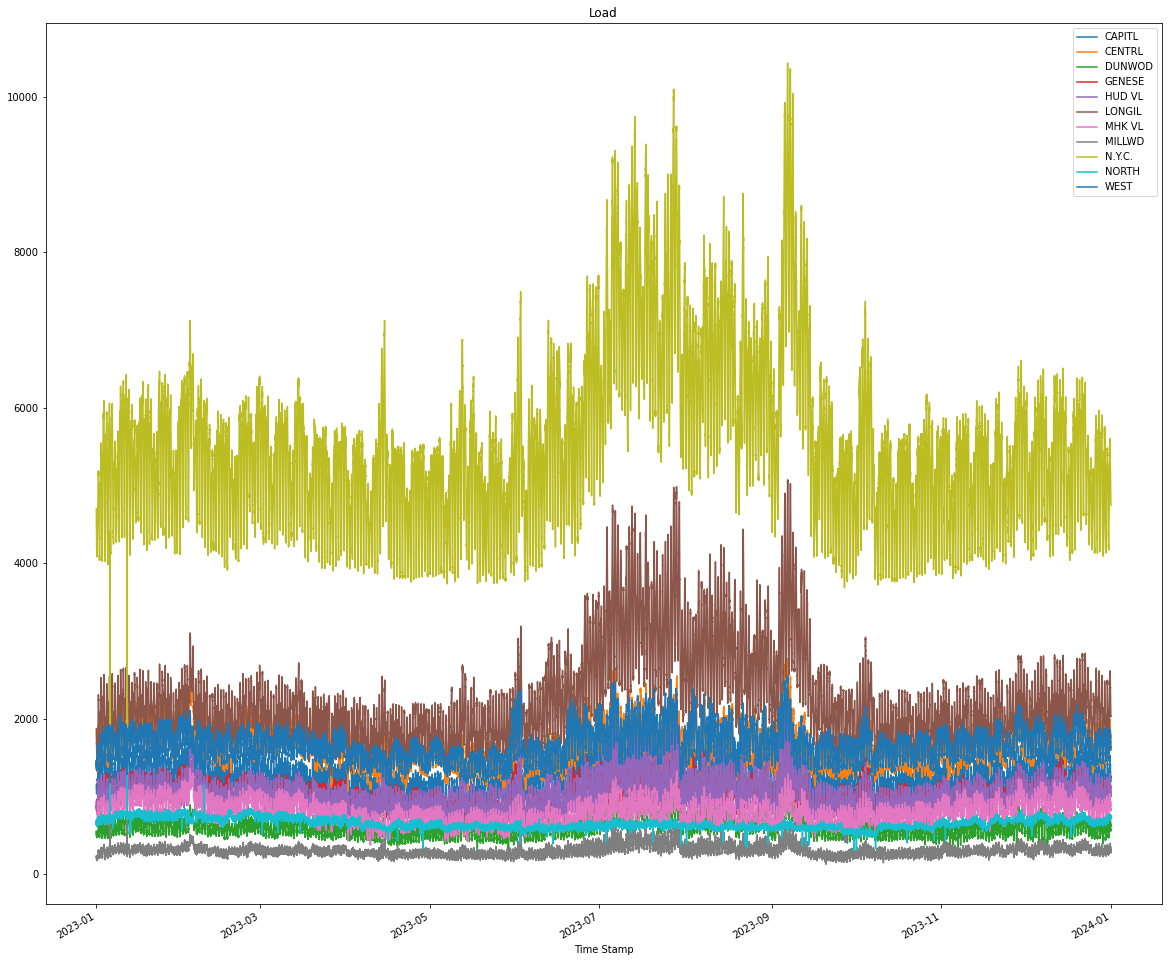

In [101]:
fig,ax = plt.subplots(figsize = (20,18))
RT_load.groupby(['Name'])['Load'].plot(legend=True,ax = ax)
ax.set_title('Load')
# From the time series plot below we can see that the load at NYC is extremely high.
# As a matter of fact, it takes up 33% of the states load. which is to be expected.
# since NYC is such a major factor of the stats electricity consumption, we will be focusing more in this zone in the further analysis.
RT_load.groupby(['Name'])['Load'].sum()/RT_load.groupby(['Name'])['Load'].sum().sum()